# Design Automation for Organs-on-Chip

This is an introduction to a design automation method for organs-on-chip developed by the Chair for Design Automation at the Technical University of Munich as part of the Munich MicroFluidic Toolkit (MMFT). This method includes the orchestration of several aspects like the size of organ modules, the required shear stress on membranes, the dimensions and geometry of channels, pump pressures, etc., and by this improves the design task for organs-on-chip. 

The design and setup can be exported to openFOAM and the design parameters and results verified using this open-source CFD simulation tool. 

Finally, the resulting geometry definition can also be exported to .STL format. A common format for computer designed 3D models that can be adapted in CAD software or directly fabricated. For example the .STL file can opened in the 3D printing software (e.g. preform) and printed. 

This is a more detailed description of the code that is published at https://github.com/cda-tum/mmft-ooc-designer that results in a streamlined flow from organ tissue definition to a complex microfluidic network definition connecting these tissues in a relevant manner, this definition is used in the https://github.com/cda-tum/mmft-stl-generator using a dedicated script for organs-on-chips and producing a ready-to-simulate or ready-to-fabricate result. 

More details about the implementation can be found in:

M. Emmerich, P. Ebner, and R. Wille. Design Automation for Organs-on-Chip. In Design, Automation and Test in Europe (DATE). 2024.

M. Emmerich, P. Ebner, and R. Wille. Automated Design for Microfluidic Channel Networks in
Multi-Organs-on-Chip. Under review.

----

# Step-by-step Tutorial
In the following a step-by-step guide on how to use the design automation method for organs-on-chip, specifically microfluidic channel networks for multi-organs-on-chip is described. Based on input values the chip is first defined and then exported to a geometry.

### 1. Package installation/import
First, the required packages and functions need to be imported. It might be necessary to first install all requirements. For this you will need to install python, and then in your IDE or teminal type: pip install -r requirements.txt

Make sure to run the cells to be able to use the tutorial interactively.

Then you can import and use the code and its functions.

In [29]:
import os
import json
import visualization_def as vd
from ooc_da import run
import ipywidgets as widgets

### 2. Organ Module Definition
Now, the tool is ready to be used. For this you can choose a template input file and adapt it to your needs.

In the following the 'ooc_male_simple' example is used as a template. The chip definitions, the number of organ modules, and their respective values can be adapted, all values are defined in SI units.

The output_path defines where the data will be stored.

In [30]:
# Path to the input JSON file and its name
input_directory = 'architectures'
filename = 'ooc_male_simple.json'

output_path = 'architectures/newfile.json'

In [31]:
vd.display_architectures(input_directory, filename, output_path)

HTML(value="<hr><h4 style='text-align:left;'>Chip Details</h4><hr>", layout=Layout(margin='10px 0 10px 0'))

Button(button_style='info', description='Save Changes', style=ButtonStyle())

Data saved to architectures/newfile.json


### 3. Automatically Design the Chip
Define the output directory (folder) and file name for where the new design definition will be stored. The data types are checked and the design automation method is performed. 
There will be an error in the output if the file name already exists, as not to overwrite any data.

The output file contains the channel lengths required for the desired flow rates in the microfluidic channel network. This output is used for further geometry definitions in the following steps.

In [32]:
design_outputfile = 'architectures/design_result/design_result.json'

In [45]:
# adapt this to the path of the JSON file you want to use
input_file = 'architectures/newfile.json' 
run(input_file, design_outputfile)

Solution converged in 4 iterations.


### 5. Design the Geometry
The geometry can now be designed based on the architecture that was created in the previous step. For this the desired output needs to be specified. 

To generate the channel positive (e.g., for subsequent simulations), set the channel_negative variable to False, vice versa to generate the chip definition (e.g., for subsequent fabrication), set the channel_negative variable to True.

Additionally, you can define if you want the output to be in meters or millimeters (this is sometimes required for 3D printing software).

In [46]:
channel_negative = True
unit_conversion_to_mm = False

### Optional: Define the Chip Geometry
If you want to generate the chip you can define the size of the chip (the distance from the channels to the sides) and the inlet size to connect the pump tubing. The input is in SI units. 

Note: Please run this cell regardless of if you want to define the chip geometry or not.

In [35]:
bottom = 600e-3
top = 600e-3
sides = 600e-3
pump_radius = 100e-3

### 6. Import the Generated Design Result
The design result generated in step 4. is now imported. 
The node and channel positions can be verified in the python plot below that visualizes the placement of channels.

This is translated to a 2D geometry and then extruded to a 3D geometry, including the surrounding geometry definition. Both the resulting 2D network as well as the 3D geometry are visualized below and saved locally.

In [36]:
import sys

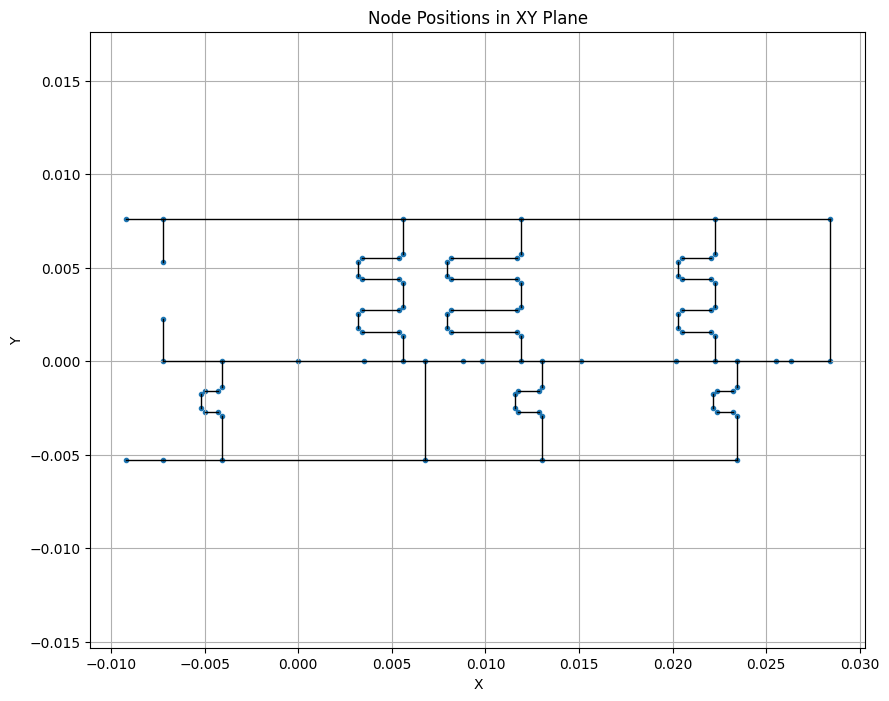

In [37]:
output_file = '../tests/output.stl'

from OOCGenerator import read_in_network_file, plot_nodes

nodes, pumps, channels, arcs, height, organ_channels = read_in_network_file(design_outputfile)

plot_nodes(nodes, channels)

In [38]:
from OOCGenerator import create_stl_file, create_svg_network_2D

In [48]:
stl_output_name = 'stl_output.stl'
create_stl_file(nodes, pumps, channels, arcs, height, bottom, top, sides, pump_radius, organ_channels, stl_output_name, channel_negative)

SVG file "output2D.svg" created successfully.
STL file "stl_output.stl" created successfully.


In [40]:
vd.display_2D_svg('output2D.svg')

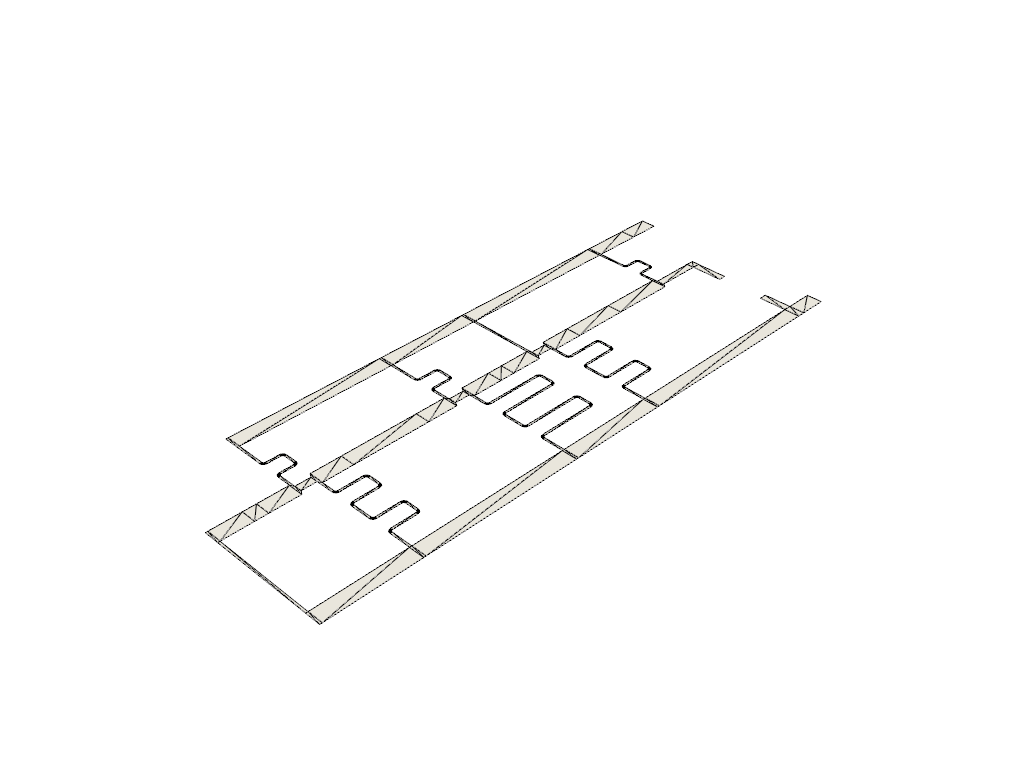

In [49]:
vd.display_3D_mesh('stl_output.stl')